# Part 6 -- Combine Features and Target (AAPL)

Prepare data for **Singular Value Decomposition (SVD)**.

### Load lib codes:

In [6]:
!pwd

/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter/ipynb


In [7]:
from os import chdir
chdir('/home/jovyan/work/Portfolio/predicting_stock_market_trends_with_Twitter/')

from lib import *
# suppress_warnings()
from lib.twitter_keys import my_keys

In [8]:
AAPL_df = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/AAPL_df.pickle')

In [9]:
tweets_df = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/tweets_df')

### Pull Y's based on date, drop non-shared, then vectorize cleaned_text

In [521]:
# AAPL_df.tail()

,Date,Open,High,Low,Close,Volume,Diff,Percent_Change,Percent_Change_Class
2365,2017-05-25,153.73,154.35,153.03,153.87,19235598,0.53,0.003444,down
2366,2017-05-26,154.00,154.24,153.31,153.61,21927637,-0.26,-0.001693,down
2367,2017-05-30,153.42,154.43,153.33,153.67,20126851,0.06,0.000390,down
2368,2017-05-31,153.97,154.17,152.38,152.76,24451164,-0.91,-0.005957,down
2369,2017-06-01,153.17,153.33,152.22,153.18,16404088,0.42,0.002742,down


In [522]:
# len(AAPL_df)

2370

In [523]:
# len(AAPL_df['Date'].unique())

2370

In [524]:
# AAPL_df.shape

(2370, 9)

In [525]:
# tweets_df.tail()

,_id,text,timestamp,username,Date,cleaned_text
87284,593592eb2c7311008078575e,Esports viewing shoots up but ad revenues have...,2017-05-08 17:45:52,FinancialTimes,2017-05-08,esports viewing shoots up but ad revenues have...
87285,593592eb2c7311008078575f,Coach hints at further deals after bagging Kat...,2017-05-08 17:45:52,FinancialTimes,2017-05-08,coach hints at further deals after bagging kat...
87286,593592eb2c73110080785760,Tyson shares hit by investigation into the pou...,2017-05-08 17:35:19,FinancialTimes,2017-05-08,tyson shares hit by investigation into the pou...
87287,593592eb2c73110080785761,BBA Aviation dips as Citigroup expresses cauti...,2017-05-08 17:35:19,FinancialTimes,2017-05-08,bba aviation dips as citigroup expresses caution
87288,593592eb2c73110080785762,Warnings of staff relocations after Brexit ris...,2017-05-08 17:30:25,FinancialTimes,2017-05-08,warnings of staff relocations after brexit ris...


In [526]:
# print(AAPL_df['Date'][0])

2008-01-02


In [527]:
# len(tweets_df['Date'].unique())

2578

In [528]:
# min(tweets_df['Date'].unique())

datetime.date(2008, 9, 10)

In [529]:
# len(AAPL_df['Date'].unique())

2370

In [530]:
# len(tweets_df)

87289

In [531]:
# tweets_df['Date'][3]

datetime.date(2017, 5, 25)

In [532]:
# AAPL_df['Date'][2365]

datetime.date(2017, 5, 25)

In [533]:
# tweets_df['Date'][3]==AAPL_df['Date'][2365]

True

In [534]:
# if tweets_df['Date'][3] in list(AAPL_df['Date']):
#     print('yes')
# else:
#     print('no')

yes


In [535]:
# yes = []
# no = []

# for i in tweets_df['Date']:
#     try:
#         if i in list(AAPL_df['Date']):
#             yes.append(i)
#         elif i not in list(AAPL_df['Date']):
#             no.append(i)
#     except:
#         print('ah')

# print(len(yes))
# print(len(no))

In [536]:
# 68006+19283

87289

In [6]:
# AAPL_df['Percent_Change_Class'].value_counts()

down       1953
neutral     226
up          190
Name: Percent_Change_Class, dtype: int64

In [7]:
# AAPL_df[AAPL_df['Percent_Change_Class']=='neutral']

,Date,Open,High,Low,Close,Volume,Diff,Percent_Change,Percent_Change_Class
20,2008-01-31,18.49,19.52,18.49,19.34,336417991,0.46,0.023785,neutral
42,2008-03-04,17.43,17.84,17.20,17.80,446345774,0.41,0.023034,neutral
49,2008-03-13,17.73,18.50,17.57,18.28,316058785,0.28,0.015317,neutral
59,2008-03-28,20.26,20.66,20.23,20.43,178829581,0.39,0.019090,neutral
65,2008-04-07,22.30,22.81,22.16,22.27,289771916,0.40,0.017961,neutral
68,2008-04-10,21.59,22.20,21.51,22.08,239122247,0.45,0.020380,neutral
77,2008-04-23,23.44,23.55,23.01,23.27,376047707,0.38,0.016330,neutral
81,2008-04-29,24.44,25.09,24.32,25.01,230868855,0.40,0.015994,neutral
85,2008-05-05,25.99,26.47,25.86,26.39,213639223,0.54,0.020462,neutral
90,2008-05-12,26.46,26.98,26.12,26.88,204841490,0.67,0.024926,neutral


In [10]:
import datetime as dt
from datetime import datetime

In [8]:
# tweets_df.loc[tweets_df['Date']==dt.date(2017, 5, 18)]

,_id,text,timestamp,username,Date,cleaned_text
1567,5935926856753600d03f9eeb,Tad Cummins indicted on federal charges. The f...,2017-05-18 23:58:13,cnnbrk,2017-05-18,tad cummins indicted on federal charges the fo...
1569,5935926856753600d03f9eec,RT @cnni: First on CNN: Rep. Devin Nunes is st...,2017-05-18 22:35:25,cnnbrk,2017-05-18,rt cnni first on cnn rep devin nunes is still ...
1571,5935926856753600d03f9eed,US demand is behind Mexico's bloody war on dru...,2017-05-18 22:15:52,cnnbrk,2017-05-18,us demand is behind mexico s bloody war on dru...
1574,5935926856753600d03f9eee,RT @CNNPolitics: First on CNN: Investigators o...,2017-05-18 21:55:21,cnnbrk,2017-05-18,rt cnnpolitics first on cnn investigators on t...
1576,5935926856753600d03f9eef,RT @CNNPolitics: The US summoned the Turkish a...,2017-05-18 21:54:52,cnnbrk,2017-05-18,rt cnnpolitics the us summoned the turkish amb...
1578,5935926856753600d03f9ef0,Did Trump ask FBI Director James Comey to end ...,2017-05-18 20:41:54,cnnbrk,2017-05-18,did trump ask fbi director james comey to end ...
1580,5935926856753600d03f9ef1,"RT @TheLeadCNN: President Trump says, ""Believe...",2017-05-18 20:29:21,cnnbrk,2017-05-18,rt theleadcnn president trump says believe me ...
1582,5935926856753600d03f9ef2,"RT @TheLeadCNN: President Trump: ""My administr...",2017-05-18 20:16:21,cnnbrk,2017-05-18,rt theleadcnn president trump my administratio...
1584,5935926856753600d03f9ef3,RT @CNNMoney: Stocks recover. Dow gains 56 poi...,2017-05-18 20:04:44,cnnbrk,2017-05-18,rt cnnmoney stocks recover dow gains 56 points...
1586,5935926856753600d03f9ef4,RT @CNNPolitics: President Trump is set to fac...,2017-05-18 19:56:08,cnnbrk,2017-05-18,rt cnnpolitics president trump is set to face ...


In [580]:
# AAPL_df['Percent_Change_Class'].loc[AAPL_df['Date']==dt.date(2017, 5, 18)].values

array(['neutral'], dtype=object)

In [581]:
# tweets_df.loc[tweets_df['Date']==dt.date(2017, 5, 18)].values

array([[ObjectId('5935926856753600d03f9eeb'),
        'Tad Cummins indicted on federal charges. The former Tennessee teacher is accused of abducting a 15-year-old student… https://t.co/sRRff94g0Z',
        Timestamp('2017-05-18 23:58:13'), 'cnnbrk',
        datetime.date(2017, 5, 18),
        'tad cummins indicted on federal charges the former tennessee teacher is accused of abducting a 15 year old student '],
       [ObjectId('5935926856753600d03f9eec'),
        'RT @cnni: First on CNN: Rep. Devin Nunes is still reviewing Russia intelligence, despite his recusal from probe https://t.co/wrFBTnabhi htt…',
        Timestamp('2017-05-18 22:35:25'), 'cnnbrk',
        datetime.date(2017, 5, 18),
        'rt cnni first on cnn rep devin nunes is still reviewing russia intelligence despite his recusal from probe htt '],
       [ObjectId('5935926856753600d03f9eed'),
        'US demand is behind Mexico\'s bloody war on drugs, Sec. Tillerson says. "Americans must own this problem. It is ours… htt

In [582]:
# len(tweets_df['Date'])

87289

In [583]:
# change = []

# for i in tweets_df['Date'][0:1568]:
#     if i in list(AAPL_df['Date']):
#         change.append(AAPL_df['Percent_Change_Class'].loc[AAPL_df['Date']==i].values)
#     elif i not in list(AAPL_df['Date']):
#         change.append('Stock not available for this date')
#         pass
        
# change_df = pd.DataFrame(change)
# change_df

,0
0,Stock not available for this date
1,Stock not available for this date
2,Stock not available for this date
3,[down]
4,[down]
5,[down]
6,Stock not available for this date
7,[down]
8,[down]
9,[down]


In [11]:
def match_dates_and_get_stock_change(features_df, target_df):
    change = []

    for i in features_df['Date']:
        try:
            if i in list(target_df['Date']):
                change.append(target_df['Percent_Change_Class'].loc[target_df['Date']==i].values)
            elif i not in list(target_df['Date']):
                change.append('Stock not available for this date')
                pass
        except Exception as e:
            print('Error:', e)
            
    return pd.DataFrame(change)

In [12]:
start = datetime.now()

change_df = match_dates_and_get_stock_change(tweets_df, AAPL_df)

end = datetime.now()
print(end - start)

0:01:01.793952


In [13]:
pd.to_pickle(change_df, '../predicting_stock_market_trends_with_Twitter/data/change_df.pickle')

In [14]:
change_df[0].value_counts()

[down]                               61112
Stock not available for this date    19283
[neutral]                             4959
[up]                                  1935
Name: 0, dtype: int64

In [587]:
# 61112+19283+4959+1935

87289

### Now, we have our X's and y's:
* **FEATURES (X's)** == tweets (\_id, text, timestamp, username, cleaned_text, Date) 
* **TARGET (y's)** == change in stock prices (BUY/SELL/NEUTRAL)

They have the same number of rows and are in the same order, so our X and Y's are already split.

### Merge & drop rows where there's no stock data for Tweets:

In [15]:
combined_df_nodrop = tweets_df.merge(change_df, left_index=True, right_index=True)

In [14]:
# combined_df_nodrop

,_id,text,timestamp,username,Date,cleaned_text,0
0,593592642c7311008077a8a5,"On this National Gun Violence Awareness Day, l...",2017-06-02 17:35:54,BarackObama,2017-06-02,on this national gun violence awareness day le...,Stock not available for this date
1,593592642c7311008077a8a6,Forever grateful for the service and sacrifice...,2017-05-29 13:09:16,BarackObama,2017-05-29,forever grateful for the service and sacrifice...,Stock not available for this date
2,593592642c7311008077a8a7,Good to see my friend Prince Harry in London t...,2017-05-27 13:15:25,BarackObama,2017-05-27,good to see my friend prince harry in london t...,Stock not available for this date
3,593592642c7311008077a8a8,"Through faith, love, and resolve the character...",2017-05-25 14:13:35,BarackObama,2017-05-25,through faith love and resolve the character o...,[down]
4,593592642c7311008077a8a9,Our hearts go out to those killed and wounded ...,2017-05-23 16:56:14,BarackObama,2017-05-23,our hearts go out to those killed and wounded ...,[down]
5,593592642c7311008077a8aa,"Excited to hear from Sierra, Imani, Filiz, and...",2017-05-22 21:16:23,BarackObama,2017-05-22,excited to hear from sierra imani filiz and be...,[down]
6,593592642c7311008077a8ab,Happy Mother's Day to my love and partner on t...,2017-05-14 14:01:16,BarackObama,2017-05-14,happy mother s day to my love and partner on t...,Stock not available for this date
7,593592642c7311008077a8ac,"We're rolling up our sleeves again, back where...",2017-05-03 19:42:16,BarackObama,2017-05-03,we re rolling up our sleeves again back where ...,[down]
8,593592642c7311008077a8ad,"Well said, Jimmy. That's exactly why we fought...",2017-05-02 17:19:26,BarackObama,2017-05-02,well said jimmy that s exactly why we fought s...,[down]
9,593592642c7311008077a8ae,RT @ObamaFoundation: It’s a beautiful day on t...,2017-04-24 19:48:17,BarackObama,2017-04-24,rt obamafoundation it s a beautiful day on the...,[down]


In [15]:
# combined_df_nodrop[1566:1568]

,_id,text,timestamp,username,Date,cleaned_text,0
1566,593592682c7311008077ad7d,"In the weekly address, President Obama discuss...",2015-11-07 16:58:54,BarackObama,2015-11-07,in the weekly address president obama discusse...,Stock not available for this date
1567,5935926856753600d03f9eeb,Tad Cummins indicted on federal charges. The f...,2017-05-18 23:58:13,cnnbrk,2017-05-18,tad cummins indicted on federal charges the fo...,[neutral]


In [16]:
pd.to_pickle(combined_df_nodrop, '../predicting_stock_market_trends_with_Twitter/data/combined_df_nodrop_AAPL.pickle')

In [16]:
combined_df = combined_df_nodrop[combined_df_nodrop[0]!='Stock not available for this date']

In [18]:
pd.to_pickle(combined_df, '../predicting_stock_market_trends_with_Twitter/data/combined_df_AAPL.pickle')

In [17]:
X = combined_df.drop(0, axis=1)
y = combined_df[0]

In [20]:
# type(y)

pandas.core.series.Series

In [21]:
# print(X.shape)
# print(y.shape)

(68006, 6)
(68006,)


In [597]:
68006.0/87289.0
# We kept 78% of original tweets pulled (after dropping ones that don't have a target - Percent_Change in stock price)

0.779090148816002

In [598]:
pd.to_pickle(X, '../predicting_stock_market_trends_with_Twitter/data/X.pickle')

In [599]:
pd.to_pickle(y, '../predicting_stock_market_trends_with_Twitter/data/y_AAPL.pickle')

In [22]:
# combined_df[0].value_counts()

[down]       61112
[neutral]     4959
[up]          1935
Name: 0, dtype: int64

In [601]:
# combined_df_nodrop[0].value_counts()

[down]                               61112
Stock not available for this date    19283
[neutral]                             4959
[up]                                  1935
Name: 0, dtype: int64

### Explore with WordCloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
combined_df_AAPL = pd.read_pickle('../predicting_stock_market_trends_with_Twitter/data/combined_df_AAPL.pickle')

# Finding meaning in tweets is maybe about nuance, so try taking away all the features that add to our variance!!!!!!

In [ ]:
# Edit stop words to focus more on nuances and take away the noise
stopwords = set(STOPWORDS)
stopwords.add('rt')
stopwords.add('amp')

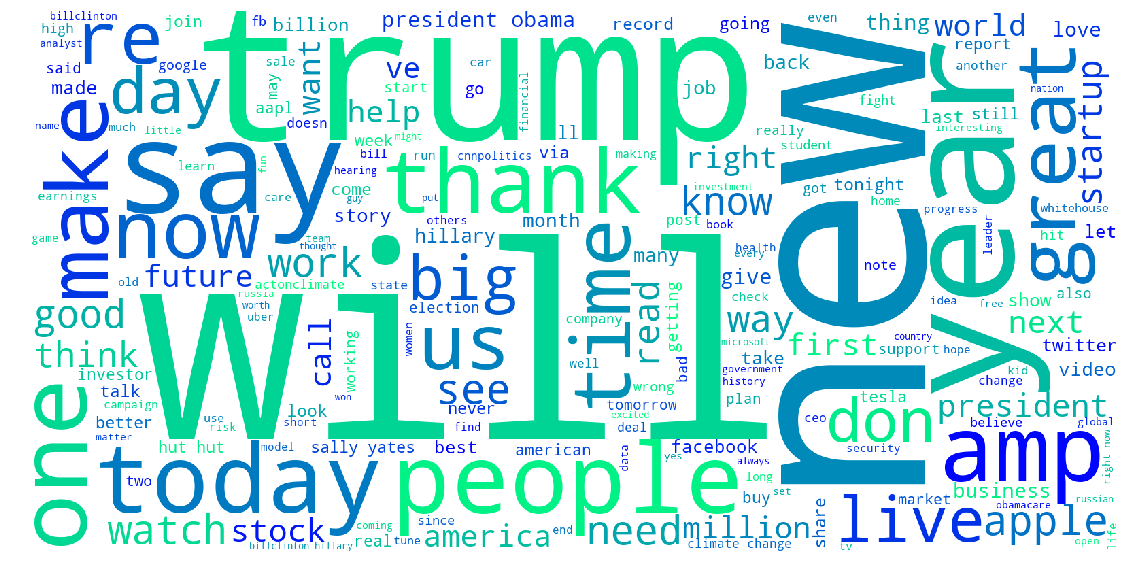

In [45]:
up_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='winter').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='up']))

plt.figure(figsize=(20,10))
plt.imshow(up_wc)
plt.axis("off")
plt.show()

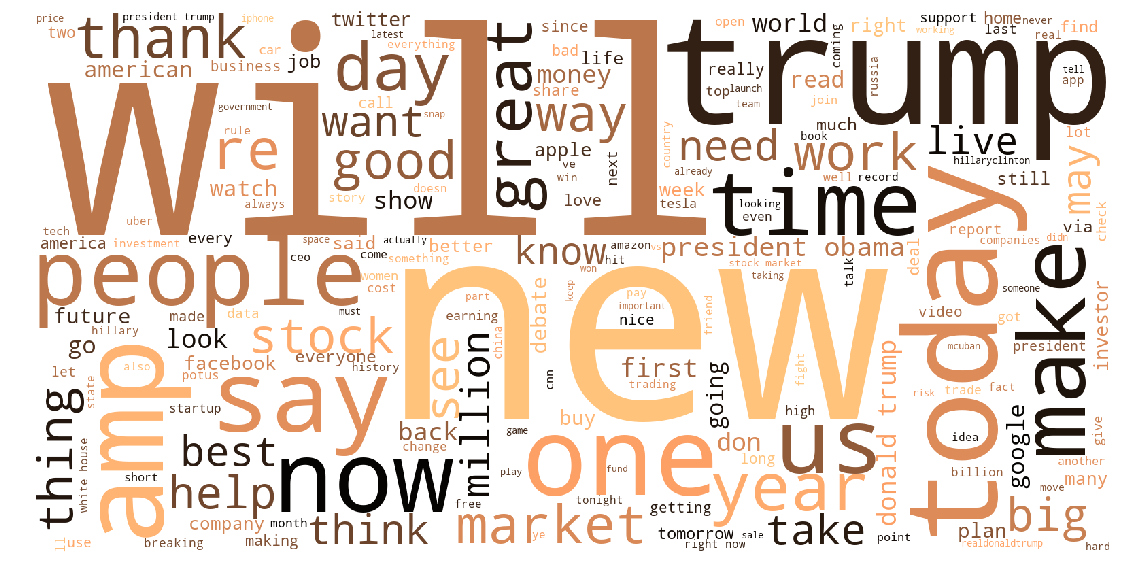

In [605]:
stopwords = set(STOPWORDS)
stopwords.add("rt")
neutral_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='copper').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='neutral']))

plt.figure(figsize=(20,10))
plt.imshow(neutral_wc)
plt.axis("off")
plt.show()

# ADD BIG WORDS TO STOP WORDS SO smaller words are highlighted. 

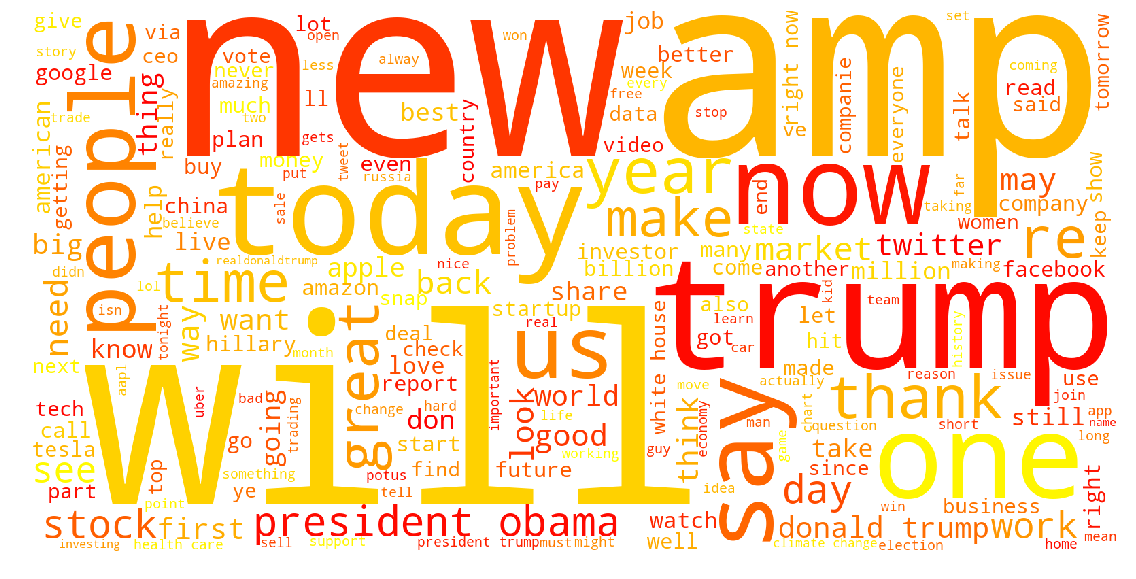

In [610]:
stopwords = set(STOPWORDS)
stopwords.add("rt")
down_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='autumn').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='down']))

plt.figure(figsize=(20,10))
plt.imshow(down_wc)
plt.axis("off")
plt.show()

### LabelEncode TARGET (for LogisticRegression models)

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib

In [34]:
le = LabelEncoder()

In [35]:
y_le = le.fit_transform(y)

In [36]:
le.inverse_transform(y_le)

array([array(['down'], dtype=object), array(['down'], dtype=object),
       array(['down'], dtype=object), ..., array(['up'], dtype=object),
       array(['up'], dtype=object), array(['up'], dtype=object)], dtype=object)

In [37]:
le.classes_

array([array(['down'], dtype=object), array(['neutral'], dtype=object),
       array(['up'], dtype=object)], dtype=object)

In [38]:
le

LabelEncoder()

In [41]:
joblib.dump(y_le, '../predicting_stock_market_trends_with_Twitter/data/y_AAPL_le.pickle')

['../predicting_stock_market_trends_with_Twitter/data/y_AAPL_le.pickle']

In [40]:
joblib.dump(le, '../predicting_stock_market_trends_with_Twitter/data/y_le.transformer')

['../predicting_stock_market_trends_with_Twitter/data/y_le.transformer']

In [ ]:
# Edit stop words to focus more on nuances and take away the noise
stopwords = set(STOPWORDS)
stopwords.add('rt')
stopwords.add('amp')

In [ ]:
up_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='winter').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='up']))

plt.figure(figsize=(20,10))
plt.imshow(up_wc)
plt.axis("off")
plt.show()

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("rt")
down_wc = WordCloud(width=1600, height=800, background_color='white', relative_scaling=1, stopwords=stopwords, colormap='autumn').generate(' '.join(i for i in combined_df_AAPL['cleaned_text'][combined_df_AAPL[0]=='down']))

plt.figure(figsize=(20,10))
plt.imshow(down_wc)
plt.axis("off")
plt.show()

# Note: 